<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/Chapter7_%EC%A0%9C3%EC%9C%A0%ED%98%95(21%EC%9D%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#github와 colab 연동
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata

fatal: destination path 'yemoonsaBigdata' already exists and is not an empty directory.


# 통계적 가설 검정 실습


##1. 단일표본 T-검정

*   Trees Data: 블랙 체리나무 31그루의 둘레, 높이, 부피가 저장되어 있음.
*   "표본의 평균 = 모평균" 판단하기!



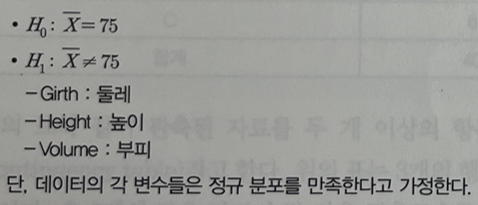

###1-1. 표본평균 Xbar를 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [5]:
import pandas as pd
import scipy.stats as stats
from math import sqrt

a = pd.read_csv('/content/yemoonsaBigdata/datasets/supplement/trees.csv')
#기초 통계량 계산 방식을 통해 표본평균 Xbar 구하기
X = a['Height'].mean()
print(round(X,2))

76.0


###1-2. 위의 가설을 검정하기 위한 검정통계량을 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [6]:
#아래의 함수를 통해 검정 통계량을 구할 수 있음.
print(stats.ttest_1samp(a['Height'], 75))
#
t_score, p_value = stats.ttest_1samp(a['Height'], 75)
print(round(t_score,2))
print(round(p_value, 4))

TtestResult(statistic=0.8738116490580545, pvalue=0.38916223357338076, df=30)
0.87
0.3892


###1-3. 위의 통계량에 대한 p- 값을 구하고 (반올림 소숫점 넷째 자리), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [7]:
print(round(p_value, 4))

#p_value 값이 0.05 이상이면 유의미하다고 보고 가설 채택함.
if p_value >= 0.05:
    print('채택')
else:
    print('기각')

0.3892
채택


##2. 독립표본 T-검정



*   Toothgrowth Data: 기니피그 60마리의 치아 길, 투여한 비타민 C 종류, 투여량이 저장되어 있는 데이터
*   "오렌지주스를 투여받은 기니피그의 치아 길이 평균 = 아스코르브산을 투여받은 기니피그의 치아 길이 평균" 판단하기!



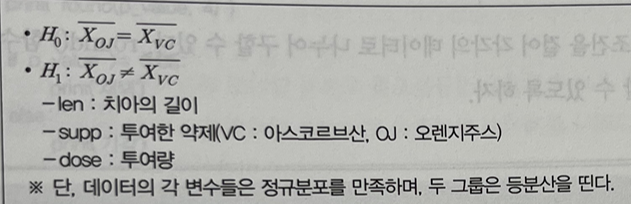

###2-1. 표본평균 XOJ bar, XVC bar를 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [11]:
import pandas as pd
import scipy.stats as stats
from math import sqrt

b = pd.read_csv('/content/yemoonsaBigdata/datasets/supplement/toothgrowth.csv')
stats.levene(b.loc[b.supp=='VC','len'], b.loc[b.supp=='OJ','len'])

VC_b = b.loc[b.supp=='VC']
OJ_b = b.loc[b.supp=='OJ']

VC_X = VC_b['len'].mean()
OJ_X = OJ_b['len'].mean()

print(round(VC_X,2), round(OJ_X, 2))

16.96 20.66


###2-2. 위의 가설을 검정하기 위한 검정통계량을 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [9]:
stats.ttest_ind(VC_b['len'], OJ_b['len'], equal_var=True)

t_score, p_value = stats.ttest_ind(VC_b['len'], OJ_b['len'], equal_var=True)
print(round(t_score,2))
print(round(p_value,4))

-1.92
0.0604


###2-3. 위의 통계량에 대한 p-값을 구하고(반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오

In [10]:
if p_value > 0.05:
    print('채택')
else:
    print('기각')

채택


##3. 쌍체표본 T-검정



*   insectsprays Data: 스프레이를 뿌리기 전에 측정한 곤충의 수와 뿌린 다음의 곤충의 수가 저장되어 있는 데이터
*   "해당 스프레이가 구제 효과가 있는지(뿌린 뒤, 곤충의 수가 감소했는지)" 판단하기!




###3-1. 표본 평균 Md를 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [14]:
c = pd.read_csv('/content/yemoonsaBigdata/datasets/supplement/insectsprays.csv')
diff = c['after_spr']-c['before_spr']
m_d = diff.mean()
print(round(m_d,2))

-12.0


###3-2. 위의 가설을 검정하기 위한 검정통계량을 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [16]:
t_score, p_value = stats.ttest_rel(c['before_spr'],c['after_spr'], alternative='greater')
print(round(t_score,2))

14.89


###3-3. 위의 통계량에 대한 p-값을 구하고(반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [18]:
print(round(p_value,4))

if p_value >= 0.05:
    print('채택')
else:
    print('기각')

0.0
기각


##4. 일원분산분석(One-way ANOVA)



*   IRIS Data
*   "붓꽃의 종에 따라 꽃받침의 너비 차이가 나는지" 판단하기!




###4-1. versicolor 종의 평균 꽃받침 너비를 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [19]:
d = pd.read_csv('/content/yemoonsaBigdata/datasets/supplement/iris.csv')
result = d.loc[d['species']=='versicolor', 'sepal_width'].mean()
print(round(result,2))

2.77


###4-2. 위의 가설을 검정하기 위한 검정통계량을 구하시오.

(반올림하여 소숫점 둘째 자리까지 계산)

In [21]:
#분산분석을 하기 위해 붓꽃 종별 꽃받침 너비 값들을 각각 X1, X2, X3 에 저장함.
X1 = d.loc[d['species']=='setosa', 'sepal_width']
X2 = d.loc[d['species']=='versicolor', 'sepal_width']
X3 = d.loc[d['species']=='virginica', 'sepal_width']

test_result = stats.f_oneway(X1,X2,X3)
print(round(test_result.statistic,2))

49.16


###4-3. 위의 통계량에 대한 p-값을 구하고(반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [22]:
p_value = test_result.pvalue
print(round(p_value,4))

if p_value >= 0.05:
    print('채택')
else:
    print('기각')

0.0
기각
